<a href="https://colab.research.google.com/github/iammhk/Quant-101/blob/main/Stock_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install python-binance

In [66]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
print('Tensorflow version: {}'.format(tf.__version__))

import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('seaborn')

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd

from binance.client import Client
from binance.enums import *

Tensorflow version: 2.7.0


In [50]:
def get_data(ticker):
    client = Client()
    coin_name = ticker
    base_name = "USDT"

    start_date = "1-Jan-2020"
    end_date = "31-Dec-2021"

    candles = client.get_historical_klines(coin_name+base_name, Client.KLINE_INTERVAL_1DAY, start_date, end_date)
    print("Data Downloaded")
    coin_df = pd.DataFrame(candles, columns=['OpenTime', 'Open', 'High', 'Low', 'Close', 'Volume', 'CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'])
    coin_df.set_index('OpenTime', inplace=True)
    #print(coin_df.head())
    # export DataFrame to csv
    coin_df.to_csv(coin_name+base_name+"_1Day("+start_date+"_"+end_date+')'+'.csv')
    print("Data Saved!")
    return coin_df

In [51]:
def clean_data(dframe):
    # Replace 0 to avoid dividing by 0 later on
    dframe['Volume'].replace(to_replace=0, method='ffill', inplace=True)
    dframe.sort_values('OpenTime', inplace=True)
    print(dframe.head())
    ###############################################################################

    '''Normalize price columns'''

    min_return = min(dframe[['Open', 'High', 'Low', 'Close']].min(axis=0))
    max_return = max(dframe[['Open', 'High', 'Low', 'Close']].max(axis=0))

    # Min-max normalize price columns (0-1 range)
    dframe['Open'] = (dframe['Open'] - min_return) / (max_return - min_return)
    dframe['High'] = (dframe['High'] - min_return) / (max_return - min_return)
    dframe['Low'] = (dframe['Low'] - min_return) / (max_return - min_return)
    dframe['Close'] = (dframe['Close'] - min_return) / (max_return - min_return)

    ###############################################################################
    '''Normalize volume column'''

    min_volume = dframe['Volume'].min(axis=0)
    max_volume = dframe['Volume'].max(axis=0)

    return dframe

In [52]:
#client = Client(api_key, api_secret)
coin="BTC"
coin1="ADA"
coin2="ETH"
df1 = get_data(coin1)
df2 = get_data(coin2)
df = get_data(coin)

Data Downloaded
Data Saved!
Data Downloaded
Data Saved!
Data Downloaded
Data Saved!


In [53]:
df1 = pd.read_csv(coin1+"USDT_1Day(1-Jan-2020_31-Dec-2021).csv")
df2 = pd.read_csv(coin2+"USDT_1Day(1-Jan-2020_31-Dec-2021).csv")
df= pd.read_csv(coin+"USDT_1Day(1-Jan-2020_31-Dec-2021).csv")

df1 = clean_data(df1)
df2 = clean_data(df2)
df = clean_data(df)

# Convert pandas columns into arrays
stock1_data = df1.values
stock2_data = df2.values
stock_data = df.values

        OpenTime     Open     High  ...        TBAV          TBQV  NA
0  1577836800000  0.03285  0.03380  ...  14857010.7  4.958391e+05   0
1  1577923200000  0.03345  0.03348  ...  19344719.1  6.353559e+05   0
2  1578009600000  0.03269  0.03446  ...  53816813.9  1.820772e+06   0
3  1578096000000  0.03417  0.03450  ...  26567804.8  9.061852e+05   0
4  1578182400000  0.03436  0.03527  ...  33390473.2  1.159713e+06   0

[5 rows x 12 columns]
        OpenTime    Open    High  ...          TBAV          TBQV  NA
0  1577836800000  129.16  133.05  ...   71847.93883  9.407940e+06   0
1  1577923200000  130.72  130.78  ...  105830.56192  1.361506e+07   0
2  1578009600000  127.19  135.14  ...  227899.25531  2.986355e+07   0
3  1578096000000  134.37  135.85  ...   85809.67556  1.147696e+07   0
4  1578182400000  134.20  138.19  ...  126786.52057  1.726044e+07   0

[5 rows x 12 columns]
        OpenTime     Open    High  ...          TBAV          TBQV  NA
0  1577836800000  7195.24  7255.0  ...   89

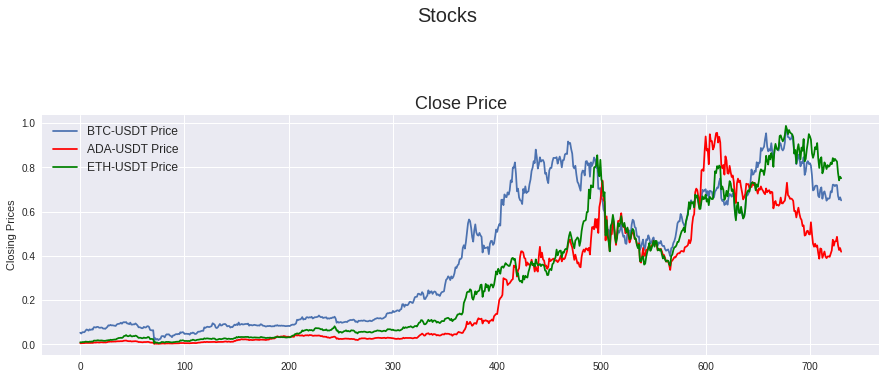

In [54]:
fig = plt.figure(figsize=(15,15))
st = fig.suptitle("Stocks", fontsize=20)
#st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(311)
ax1.plot(np.arange(stock_data.shape[0]), df['Close'], label=(coin+'-USDT Price'))
ax1.plot(np.arange(stock1_data.shape[0]), df1['Close'], label=(coin1+'-USDT Price'), color ='red')
ax1.plot(np.arange(stock2_data.shape[0]), df2['Close'], label=(coin2+'-USDT Price'), color ='green')
ax1.set_ylabel('Closing Prices')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)


In [55]:
def pct_change(dframe):
    '''Calculate percentage change'''
    dframe['Open'] = dframe['Open'].pct_change() # Create arithmetic returns column
    dframe['High'] = dframe['High'].pct_change() # Create arithmetic returns column
    dframe['Low'] = dframe['Low'].pct_change() # Create arithmetic returns column
    dframe['Close'] = dframe['Close'].pct_change() # Create arithmetic returns column
    dframe['Volume'] = dframe['Volume'].pct_change()

    dframe.dropna(how='any', axis=0, inplace=True) # Drop all rows with NaN values\
    return dframe

In [56]:
df_chng = pct_change(df)
df1_chng = pct_change(df1)
df2_chng = pct_change(df2)

In [57]:
# Min-max normalize volume columns (0-1 range)
#df['Volume'] = (df['Volume'] - min_volume) / (max_volume - min_volume)
#print(df_train.head())
###############################################################################

'''Create training, validation and test split'''

times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

print(df_train.head())
# Remove date column
df_train.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)
df_val.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)
df_test.drop(columns=['OpenTime','CloseTime', 'QAV', 'NT', 'TBAV', 'TBQV','NA'], inplace=True)

# Convert pandas columns into arrays
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

print(df_train.head())

        OpenTime      Open      High  ...          TBAV          TBQV  NA
1  1577923200000  0.001620 -0.012238  ...  15141.611340  1.070608e+08   0
2  1578009600000 -0.068823  0.056116  ...  35595.496273  2.577131e+08   0
3  1578096000000  0.119217 -0.000276  ...  16369.382248  1.200351e+08   0
4  1578182400000  0.002579  0.025125  ...  19455.369564  1.446001e+08   0
5  1578268800000  0.000966  0.080892  ...  28853.767770  2.184116e+08   0

[5 rows x 12 columns]
Training data shape: (584, 5)
Validation data shape: (73, 5)
Test data shape: (73, 5)
       Open      High       Low     Close    Volume
1  0.001620 -0.012238 -0.073802 -0.068780  0.902736
2 -0.068823  0.056116 -0.017088  0.119127  1.141638
3  0.119217 -0.000276  0.129874  0.002568 -0.561762
4  0.002579  0.025125  0.013120  0.001299  0.278215
5  0.000966  0.080892  0.008134  0.111628  0.425363


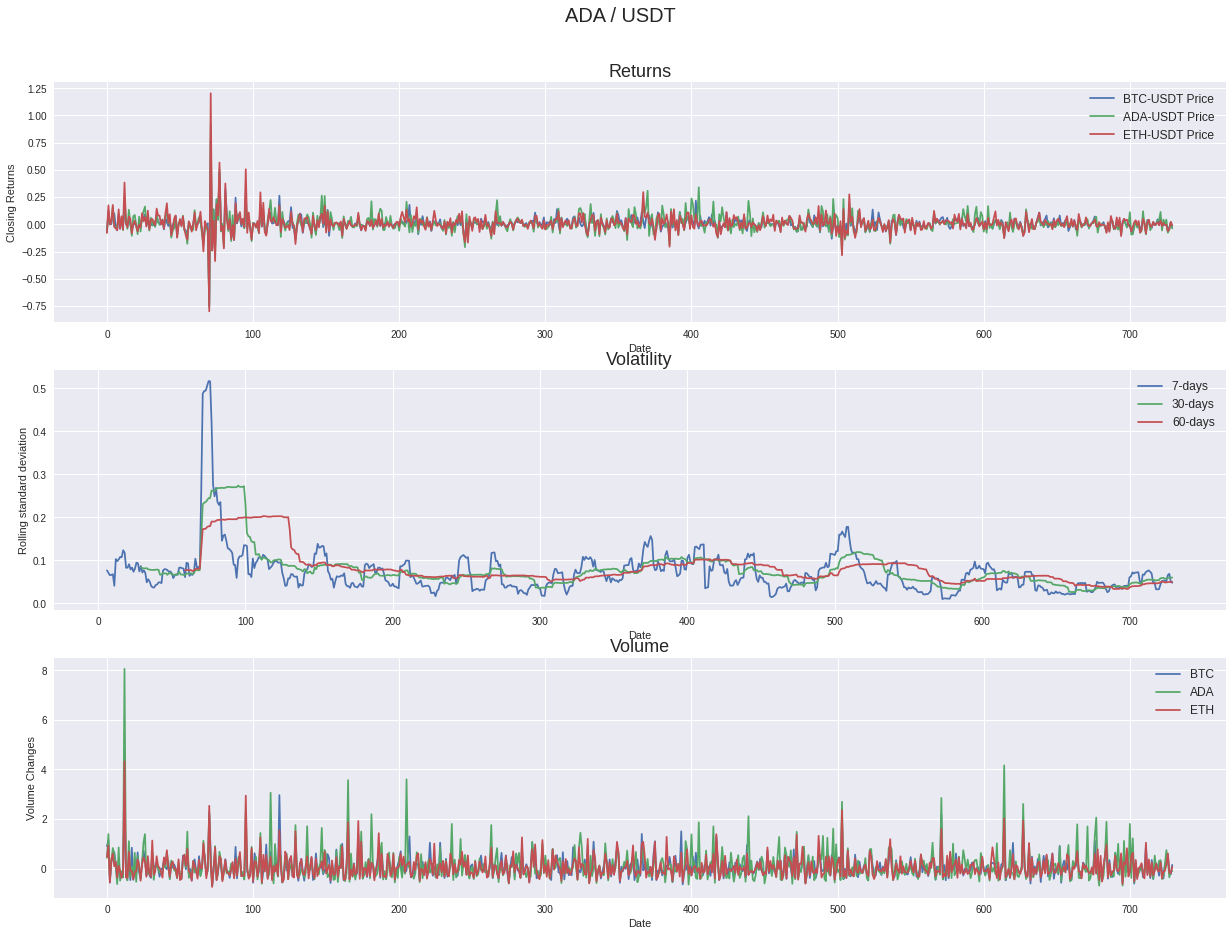

In [62]:
fig = plt.figure(figsize=(21,15))
st = fig.suptitle("ADA / USDT", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(311)
ax1.plot(np.arange(df_chng.shape[0]), df_chng['Close'], label=(coin+'-USDT Price'))
ax1.plot(np.arange(df1_chng.shape[0]), df1_chng['Close'], label=(coin1+'-USDT Price'))
ax1.plot(np.arange(df2_chng.shape[0]), df2_chng['Close'], label=(coin2+'-USDT Price'))

ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Returns')
ax1.set_title("Returns", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################
ax2 = fig.add_subplot(312)
ax2.plot(np.arange(df1_chng.shape[0]), df1_chng['Close'].rolling(7).std(), label='7-days ')
ax2.plot(np.arange(df1_chng.shape[0]), df1_chng['Close'].rolling(30).std(), label='30-days')
ax2.plot(np.arange(df1_chng.shape[0]), df1_chng['Close'].rolling(60).std(), label='60-days')

ax2.set_xlabel('Date')
ax2.set_ylabel('Rolling standard deviation')
ax2.set_title("Volatility", fontsize=18)
ax2.legend(loc="best", fontsize=12)

###############################################################################

ax3 = fig.add_subplot(313)
ax3.plot(np.arange(df_chng.shape[0]), df_chng['Volume'], label=coin)
ax3.plot(np.arange(df1_chng.shape[0]), df1_chng['Volume'], label=coin1)
ax3.plot(np.arange(df2_chng.shape[0]), df2_chng['Volume'], label=coin2)

ax3.set_xlabel('Date')
ax3.set_ylabel('Volume Changes')
ax3.set_title("Volume", fontsize=18)
ax3.legend(loc="best", fontsize=12)
plt.show()

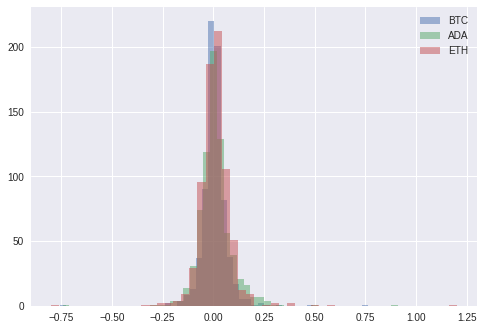

In [63]:
plt.hist(df['Close'], 50, alpha=0.5, label=coin)
plt.hist(df1['Close'], 50, alpha=0.5, label=coin1)
plt.hist(df2['Close'], 50, alpha=0.5, label=coin2)
plt.legend(loc='upper right')
plt.show()

BTC: mean=0.006 stdv=0.069
ADA: mean=0.010 stdv=0.089 

Covariance:
 [[0.00472573 0.00468319]
 [0.00468319 0.00786284]]
Pearsons correlation: 0.768
Spearmans correlation: 0.662


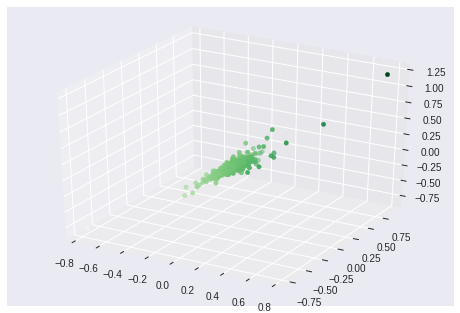

In [75]:
# Finding Correlation on returns
print('BTC: mean=%.3f stdv=%.3f' % (np.mean(df["Close"]), np.std(df["Close"])))
print('ADA: mean=%.3f stdv=%.3f \n' % (np.mean(df1["Close"]), np.std(df1["Close"])))

covariance = np.cov(df["Close"],df1["Close"])
print("Covariance:\n", covariance)

from scipy.stats import pearsonr,spearmanr
corr, _ = pearsonr(df["Close"],df1["Close"])
print('Pearsons correlation: %.3f' % corr)

corr, _ = spearmanr(df["Close"],df1["Close"])
print('Spearmans correlation: %.3f' % corr)

# plot
#plt.scatter(df1["Close"], df["Close"])
#plt.show()

ax = plt.axes(projection='3d')
# Data for three-dimensional scattered points
ax.scatter3D(df["Close"],df1["Close"],df2["Close"], c=df["Close"], cmap='Greens');